In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-05-15 02:15:00.323930: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 02:15:00.328456: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 02:15:00.421296: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 02:15:00.423167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 02:15:02.114360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 6

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
70/73 [===========================>..] - ETA: 0s - loss: 1.5780 - accuracy: 0.3712
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
73/73 [==============================] - 2s 14ms/step - loss: 1.5738 - accuracy: 0.3743 - val_loss: 1.2653 - val_accuracy: 0.6466
Epoch 2/1000
31/73 [===========>..................] - ETA: 0s - loss: 1.2894 - accuracy: 0.5272

/home/evans_sam/oelp_time/lib64/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


65/73 [=========================>....] - ETA: 0s - loss: 1.2020 - accuracy: 0.5683
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
73/73 [==============================] - 0s 5ms/step - loss: 1.1813 - accuracy: 0.5753 - val_loss: 0.7978 - val_accuracy: 0.7276
Epoch 3/1000
63/73 [========================>.....] - ETA: 0s - loss: 0.8660 - accuracy: 0.6745
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
73/73 [==============================] - 0s 5ms/step - loss: 0.8480 - accuracy: 0.6807 - val_loss: 0.4870 - val_accuracy: 0.8693
Epoch 4/1000
69/73 [===========================>..] - ETA: 0s - loss: 0.6654 - accuracy: 0.7397
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
73/73 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.7405 - val_loss: 0.3577 - val_accuracy: 0.9418
Epoch 5/1000
62/73 [========================>.....] - ETA: 0s - loss: 0.5846 - accuracy: 0.7713
Epoch 5: savin

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

25/25 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9967


In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 136ms/step
[6.5208901e-08 1.7525768e-10 4.0949820e-07 1.9951651e-08 6.3284312e-04
 9.9936670e-01]
5


97/97 [==============================] - 0s 2ms/step


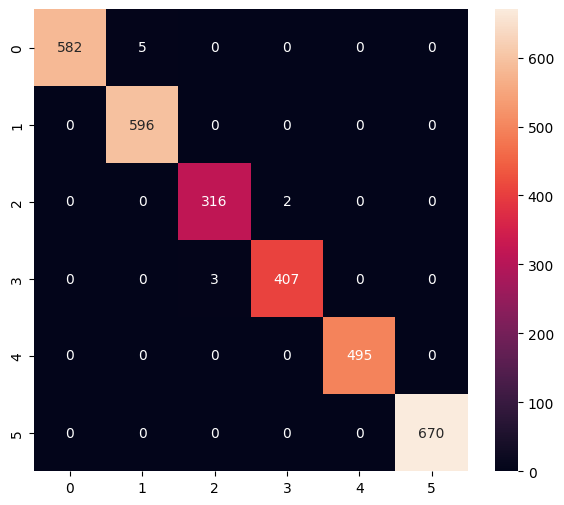

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       587
           1       0.99      1.00      1.00       596
           2       0.99      0.99      0.99       318
           3       1.00      0.99      0.99       410
           4       1.00      1.00      1.00       495
           5       1.00      1.00      1.00       670

    accuracy                           1.00      3076
   macro avg       1.00      1.00      1.00      3076
weighted avg       1.00      1.00      1.00      3076



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)

/home/evans_sam/oelp_time/lib64/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp7c0rr5xq/assets


INFO:tensorflow:Assets written to: /tmp/tmp7c0rr5xq/assets
2024-05-15 02:16:06.914101: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-05-15 02:16:06.914220: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-05-15 02:16:06.915967: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp7c0rr5xq
2024-05-15 02:16:06.918087: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-05-15 02:16:06.918118: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp7c0rr5xq
2024-05-15 02:16:06.923685: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-05-15 02:16:06.925488: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-05-15 02:16:07.005924: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6632

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 684 µs, sys: 0 ns, total: 684 µs
Wall time: 612 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.5208894e-08 1.7525767e-10 4.0949857e-07 1.9951649e-08 6.3284405e-04
 9.9936670e-01]
5
